In [2]:
import numpy as np
data=np.random.randint(30, size=(6,5))

In [3]:
data #numpy의 기본형 array이다.

array([[ 9, 10,  7,  9, 15],
       [27, 16,  9,  7,  6],
       [17,  7,  2, 17,  7],
       [ 7,  6, 29, 17, 27],
       [23,  9, 25, 29, 10],
       [ 8, 10,  7, 25, 29]])

In [18]:
from numpy import*
mean(data)
mean(data, axis=0) #컬럼 단위
mean(data, axis=1) #행 단위

# 표준화 datas
datas=(data-mean(data, axis=0))/std(data, axis=0) #std=표준편차

In [21]:
mean(datas)
datas
mean(datas, axis=0)
std(datas) #1
std(datas, axis=0)
#np.mean(array), np.std(array), np.var(array)

array([1., 1., 1., 1., 1.])

In [47]:
datas.mean() #16만큼 0... 0의 수렴하는 값을 뜻함.

1.1842378929335003e-16

In [22]:
import scipy.stats as ss

In [24]:
datas

array([[-0.79519341,  0.10425721, -0.61217683, -1.059284  , -0.07249994],
       [ 1.52591168,  1.98088693, -0.41363299, -1.31351216, -1.05124918],
       [ 0.23640885, -0.83405766, -1.10853642, -0.04237136, -0.94249926],
       [-1.05309398, -1.14682928,  1.57180537, -0.04237136,  1.23249904],
       [ 1.01011055, -0.20851441,  1.1747177 ,  1.4829976 , -0.61624952],
       [-0.9241437 ,  0.10425721, -0.61217683,  0.97454128,  1.44999887]])

In [23]:
ss.zscore(data) #표준화를 한줄에 끝내는 함수 

array([[-0.79519341,  0.10425721, -0.61217683, -1.059284  , -0.07249994],
       [ 1.52591168,  1.98088693, -0.41363299, -1.31351216, -1.05124918],
       [ 0.23640885, -0.83405766, -1.10853642, -0.04237136, -0.94249926],
       [-1.05309398, -1.14682928,  1.57180537, -0.04237136,  1.23249904],
       [ 1.01011055, -0.20851441,  1.1747177 ,  1.4829976 , -0.61624952],
       [-0.9241437 ,  0.10425721, -0.61217683,  0.97454128,  1.44999887]])

In [25]:
from sklearn.preprocessing import StandardScaler 

In [26]:
StandardScaler().fit_transform(data) #표준화 함수

array([[-0.79519341,  0.10425721, -0.61217683, -1.059284  , -0.07249994],
       [ 1.52591168,  1.98088693, -0.41363299, -1.31351216, -1.05124918],
       [ 0.23640885, -0.83405766, -1.10853642, -0.04237136, -0.94249926],
       [-1.05309398, -1.14682928,  1.57180537, -0.04237136,  1.23249904],
       [ 1.01011055, -0.20851441,  1.1747177 ,  1.4829976 , -0.61624952],
       [-0.9241437 ,  0.10425721, -0.61217683,  0.97454128,  1.44999887]])

#집 값 예측을 위한 회귀 모델
#아파트 집 값 = w1*평수 + w2*층 - w3*역거리 + bias
#아파트 집 값 data -> 회귀모델(아파트 집 값 = w1*평수 + w2*층 - w3*역거리 + bias)
#아파트 집 값 = 1000*v평수 + 100*층 - 1000*역거리
#아파트 집 값 = 1200*v평수 + 200*층 - 1000*역거리

#모델링의 정의: 가중치의 변화를 주면서 가장 작은 오차를 찾는 것.
#이상치(outlier)는 평균에 크게 영향을 주기 때문에 데이터에 이상치가 포함된 경우, 제거 후 표준화를 하는 것이 좋다.
#이상치에 평균보다 덜 민감한 중앙값을 사용, IQR을 이용한 표준화를 한다. 
1) x-maen / std (이상치 제거 추천) StandScaler
2) x-median / IQR (이상치 제거 안하는 경우 추천) RobustScaler
#IQR = 전체의75%(Q3)-25%(Q1)한 값
#RMSE

평수(50) 층(10) 역까지 거리(km) 실제가격 예측가격  오차
20       3      1               3억      1억8천7백 1억1천3백
50       10     1               4억      5억       1억
...      ...    ...  

In [28]:
from sklearn.preprocessing import RobustScaler

In [33]:
mu,sigma=10,2 #평균10, 표준편차2인 정규분포를 따르는 난수 생성
x=mu+sigma*np.random.randn(100)
x
x.mean()
x.std()#x의 표준편차

2.2551934849630273

(array([ 7., 12., 14., 10., 18., 14., 12.,  8.,  1.,  4.]),
 array([ 5.70632444,  6.67992004,  7.65351565,  8.62711125,  9.60070686,
        10.57430246, 11.54789807, 12.52149367, 13.49508928, 14.46868488,
        15.44228049]),
 <a list of 10 Patch objects>)

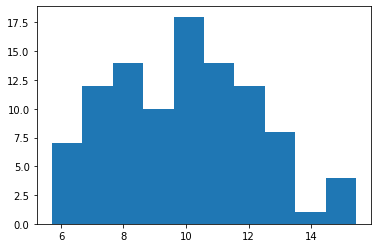

In [35]:
import matplotlib.pyplot as plt
plt.hist(x) #종 모양의 보인다...? 

In [36]:
#np.random.randn(10) #randn: 표준정규분포를 따르는 난수 10개 생성

(array([ 0.,  0.,  3., 21., 21., 34., 15.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

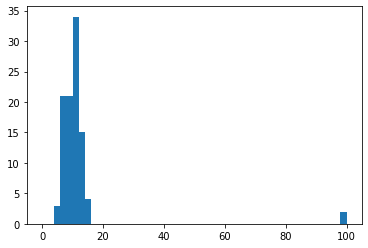

In [44]:
x[98:100]=100
x #outlier를 임의적으로 100을 집어 넣음.
plt.hist(x, bins=np.arange(0,102,2)) #bins: var의 x의 간격 2씩 증가. index는 0부터 101까지.

In [49]:
x.mean() #평균이 이상치의 영향을 크게 받음.
x.std()
x.shape
x=x.reshape(-1,1) #2차원으로 다시 설정.
x.shape

(100, 1)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,
        29., 41., 17.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
        -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
        -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
        -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
         2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
         1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
         1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
         2.60000000e+00,  2.80000000e+00]),
 <a list of 29 Patch objects>)

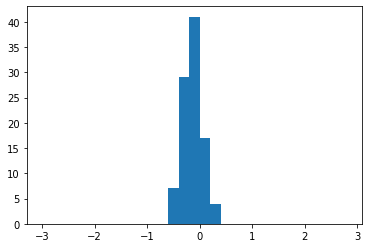

In [60]:
np.mean(StandardScaler().fit_transform(x)) #mean:0
np.std(StandardScaler().fit_transform(x)) #std:1
xs = StandardScaler().fit_transform(x) #맨 밑의 2개값의 주의 0의 가까운 수가 나와야하는데, 그렇지않음.
# plt.hist(xs) #이상치가 보임.
xss=xs[xs<5]
plt.hist(xss,bins=np.arange(-3,3,0.2))

In [66]:
#이상치 -> 중앙값, iqr 표준화
np.median(x) #9.8
q1=np.percentile(x, 25, axis=0) #x 오름차순 정렬을 했을 때, 25% 지점에 있는 데이터를 추출하는 함수 (1사분위수)
q1
q3=np.percentile(x, 75, axis=0)#(3사분위수)
q3
iqr=q3-q1
iqr #3.50

array([3.5014623])

In [70]:
xr=RobustScaler().fit_transform(x)
xr[-10:]
np.median(xr) #0, 중위수가 0이 나옴.  

-2.5370330836160804e-16